# Inner Core Lightning Threshold Analysis
In this notebook, we define the threshold for what constitutes a "lightning burst" in the inner core of a tropical cyclone. 

### How do we define a burst of lightning?
We define a lightning burst based off the number of lightning instances in a 30-minute time bin.
We start by assuming the distribution of lightning in the inner core is Gaussian.

*We look at each basin separately. Below are the basin codes:
* ATL - Atlantic Ocean basin
* CPAC - 
* EPAC - Eastern Pacific basin
* IO - Indian Ocean basin
* SHEM - Southern Hemisphere basin
* WPAC - Western North Pacific basin

### Code
Let's start by importing necessary libraries and files. The inner core dataset is created in the `data_cleaning_combined_data.ipynb` notebook (!!!!!!!!!need to rename this notebook lol)

In [1]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

In [20]:
# import data from csv file
innercore_data = pl.read_csv("WWLLN_innercore_timebin_count.csv")
innercore_data = innercore_data.with_columns(
    pl.col("time_bin").str.strptime(pl.Datetime).alias("time_bin"),
    pl.col("storm_code").str.extract(r"^(.*?)_", 1).alias("basin")
)
innercore_data = innercore_data.rename({"lightining_count":"lightning_count"}) # fix typo, can remove after it's fixed in file
innercore_data.head()

storm_code,time_bin,lightning_count,basin
str,datetime[μs],i64,str
"""ATL_10_1""",2010-06-21 07:00:00,1,"""ATL"""
"""ATL_10_1""",2010-06-23 14:30:00,1,"""ATL"""
"""ATL_10_1""",2010-06-23 15:00:00,3,"""ATL"""
"""ATL_10_1""",2010-06-23 16:30:00,2,"""ATL"""
"""ATL_10_1""",2010-06-23 22:30:00,4,"""ATL"""


Let's start by plotting a histogram of lightning counts for one TC first.

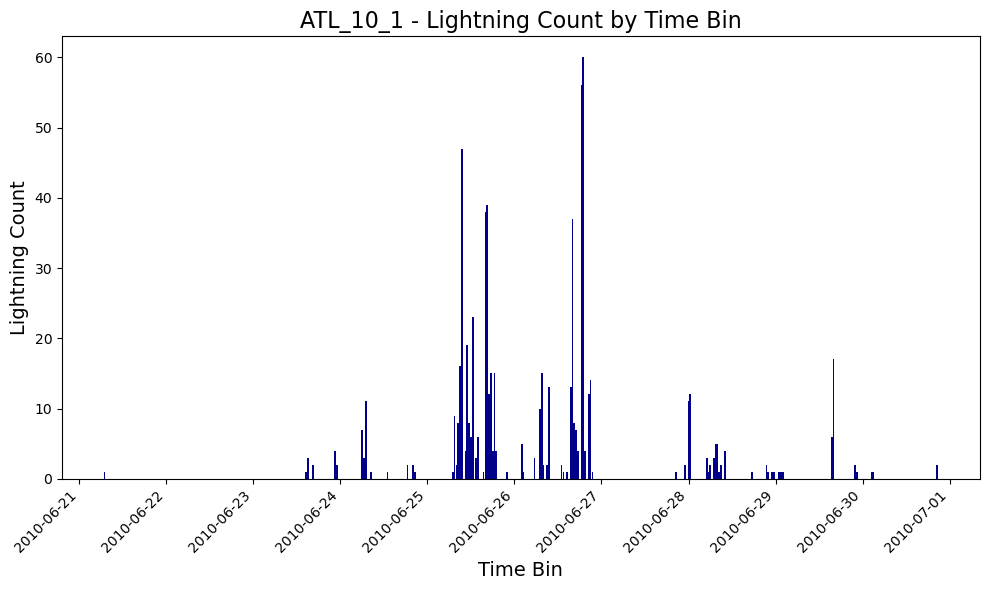

In [49]:
# Convert Polars DataFrame to pandas for plotting
atl_10_1 = innercore_data.filter(pl.col("storm_code") == "ATL_10_1")
atl_10_1_pd = atl_10_1.to_pandas()

# Plot histogram (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(atl_10_1_pd["time_bin"], atl_10_1_pd["lightning_count"], color="darkblue", width=0.02)

# Format plot
plt.title("ATL_10_1 - Lightning Count by Time Bin", fontsize=16)
plt.xlabel("Time Bin", fontsize=14)
plt.ylabel("Lightning Count", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

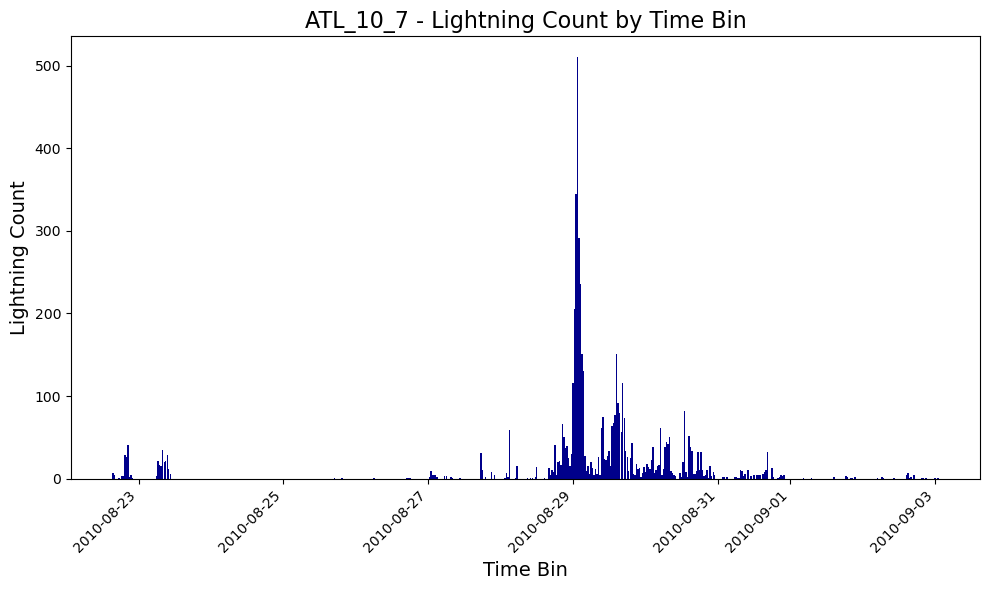

In [46]:
# Convert Polars DataFrame to pandas for plotting
atl_10_7 = innercore_data.filter(pl.col("storm_code") == "ATL_10_7")
atl_10_7_pd = atl_10_7.to_pandas()

# Plot histogram (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(atl_10_7_pd["time_bin"], atl_10_7_pd["lightning_count"], color="darkblue", width=0.02)

# Format plot
plt.title("ATL_10_7 - Lightning Count by Time Bin", fontsize=16)
plt.xlabel("Time Bin", fontsize=14)
plt.ylabel("Lightning Count", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

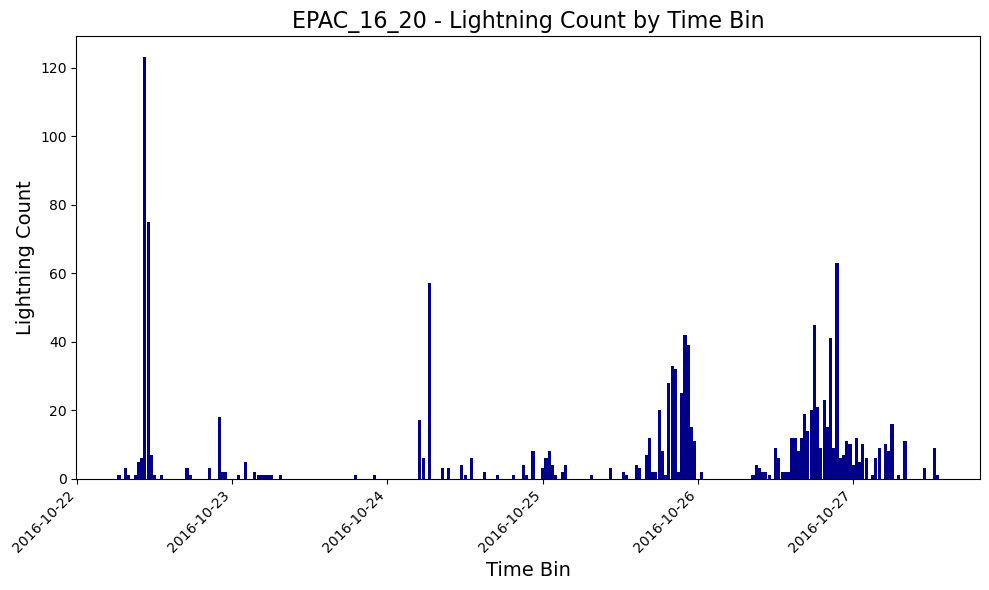

In [47]:
# Convert Polars DataFrame to pandas for plotting
epac_16_10 = innercore_data.filter(pl.col("storm_code") == "EPAC_16_20")
epac_16_10_pd = epac_16_10.to_pandas()

# Plot histogram (bar chart)
plt.figure(figsize=(10, 6))
plt.bar(epac_16_10_pd["time_bin"], epac_16_10_pd["lightning_count"], color="darkblue", width=0.02)

# Format plot
plt.title("EPAC_16_20 - Lightning Count by Time Bin", fontsize=16)
plt.xlabel("Time Bin", fontsize=14)
plt.ylabel("Lightning Count", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

#### ATL Basin

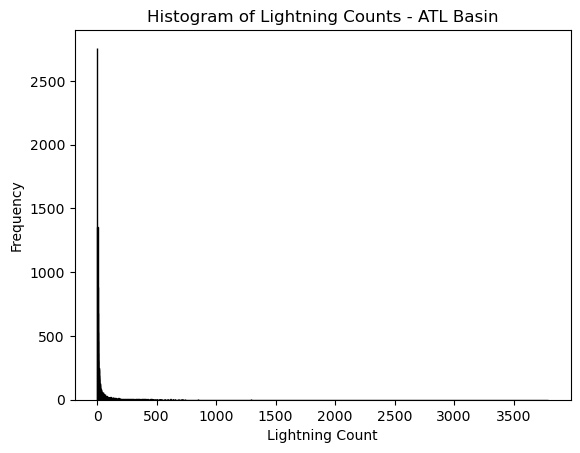

In [74]:
atl_data = innercore_data.filter(pl.col("basin") == "ATL")

lightning_counts = atl_data["lightning_count"]
# Create histogram
plt.hist(lightning_counts, bins=range(1, max(lightning_counts) + 2), edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - ATL Basin")
plt.show()

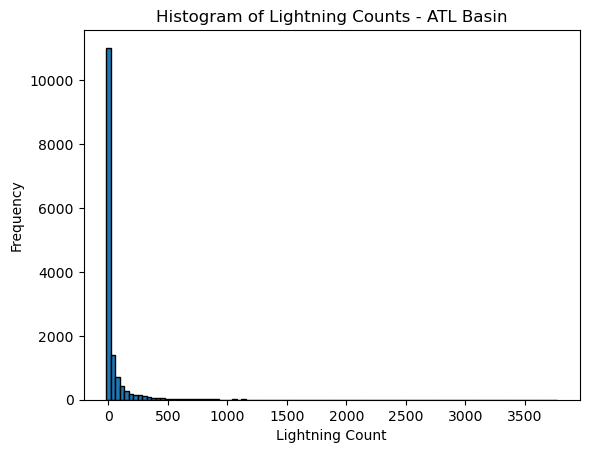

In [75]:
# Create histogram
plt.hist(lightning_counts, bins=100, edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - ATL Basin")
plt.show()

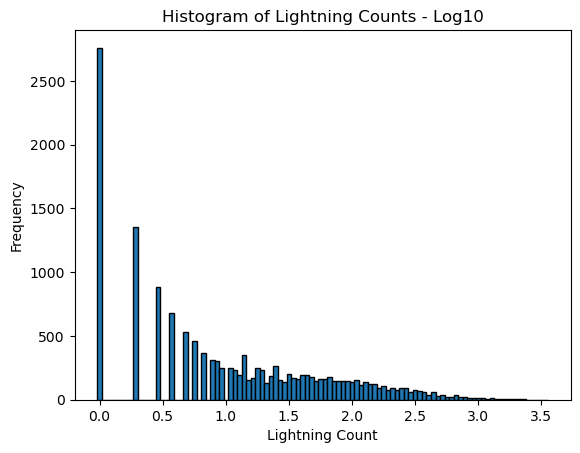

In [37]:
lightning_counts_log = np.log10(lightning_counts)

# Create histogram
plt.hist(lightning_counts_log, bins=100, edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - Log10")
plt.show()

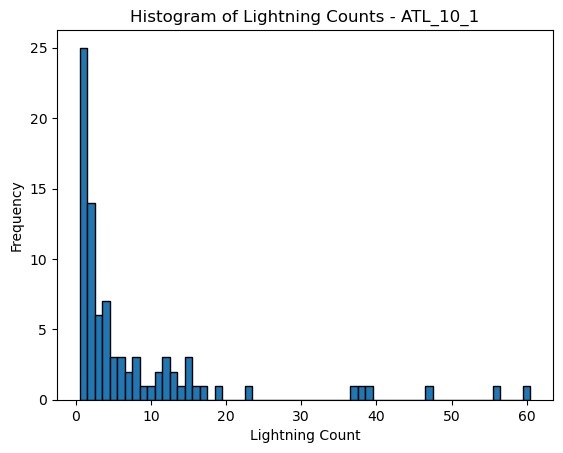

In [59]:
lightning_counts = atl_10_1["lightning_count"]
# Create histogram
plt.hist(lightning_counts, bins=range(1, max(lightning_counts) + 2), edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - ATL_10_1")
plt.show()

#### EPAC Basin

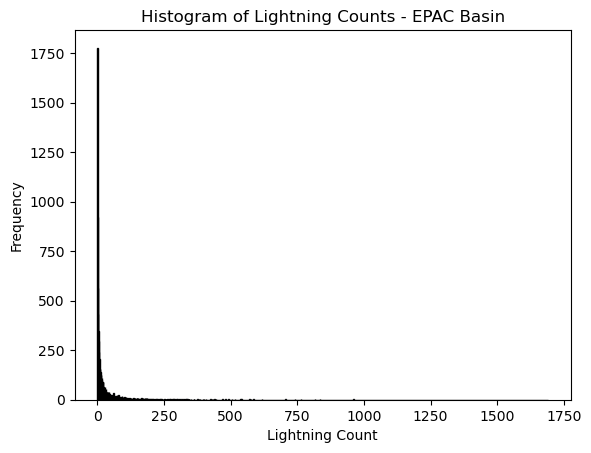

In [55]:
epac_data = innercore_data.filter(pl.col("basin") == "EPAC")

lightning_counts = epac_data["lightning_count"]
# Create histogram
plt.hist(lightning_counts, bins=range(1, max(lightning_counts) + 2), edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - EPAC Basin")
plt.show()

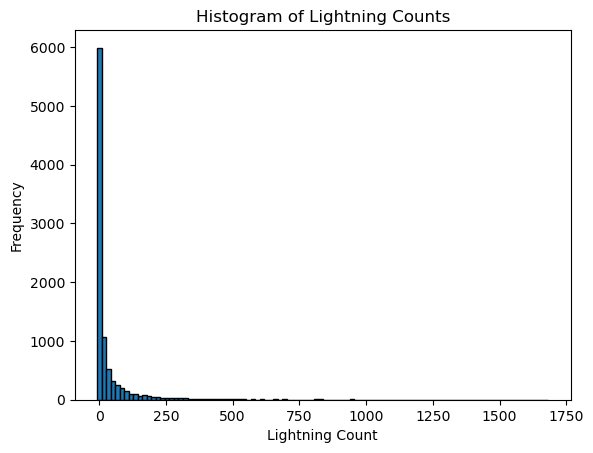

In [56]:
# Create histogram
plt.hist(lightning_counts, bins=100, edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts")
plt.show()

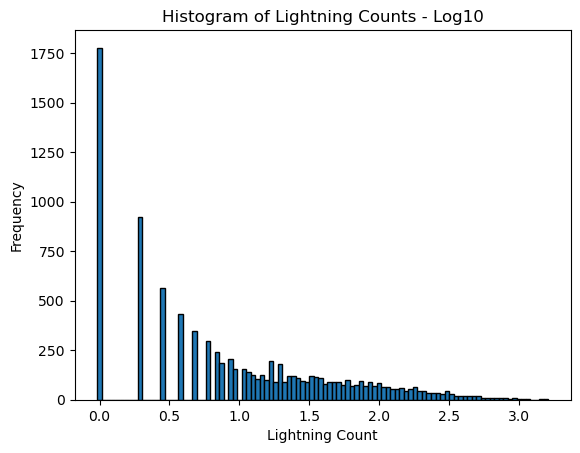

In [57]:
lightning_counts_log = np.log10(lightning_counts)

# Create histogram
plt.hist(lightning_counts_log, bins=100, edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - Log10")
plt.show()

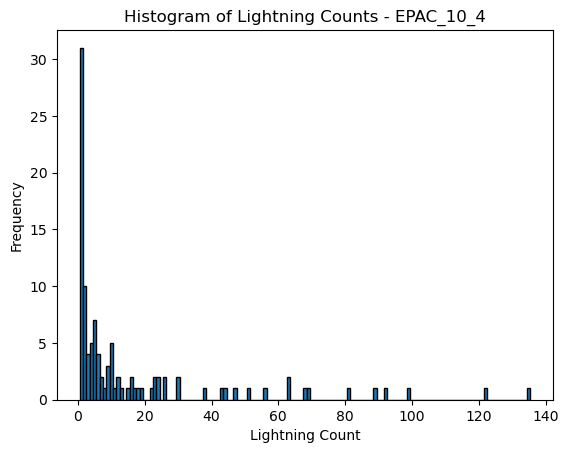

In [64]:
epac_10_4 = epac_data.filter(pl.col("storm_code") == "EPAC_10_4")
lightning_counts = epac_10_4["lightning_count"]
# Create histogram
plt.hist(lightning_counts, bins=range(1, max(lightning_counts) + 2), edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - EPAC_10_4")
plt.show()

#### IO Basin

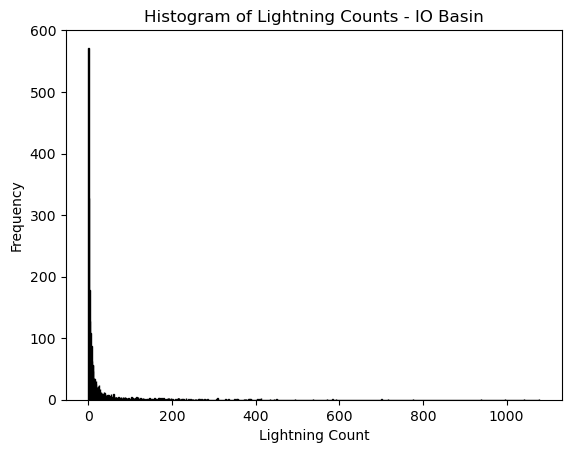

In [69]:
io_data = innercore_data.filter(pl.col("basin") == "IO")

lightning_counts = io_data["lightning_count"]
# Create histogram
plt.hist(lightning_counts, bins=range(1, max(lightning_counts) + 2), edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - IO Basin")
plt.show()

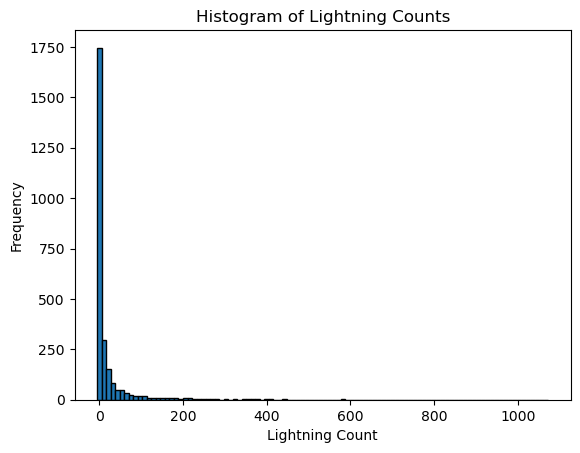

In [70]:
# Create histogram
plt.hist(lightning_counts, bins=100, edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts")
plt.show()

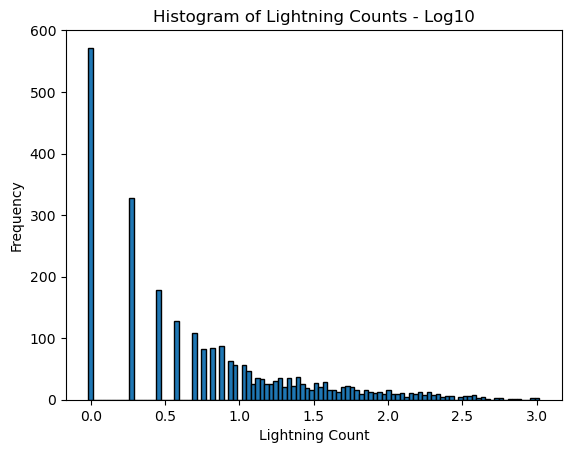

In [71]:
lightning_counts_log = np.log10(lightning_counts)

# Create histogram
plt.hist(lightning_counts_log, bins=100, edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - Log10")
plt.show()

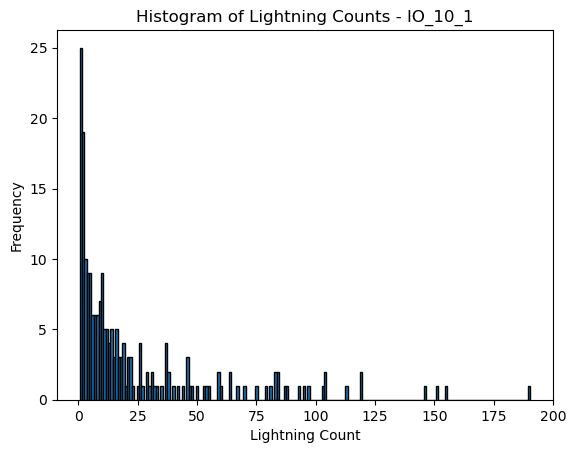

In [73]:
io_10_1 = epac_data.filter(pl.col("storm_code") == "IO_10_1")
lightning_counts = io_10_1["lightning_count"]
# Create histogram
plt.hist(lightning_counts, bins=range(1, max(lightning_counts) + 2), edgecolor="black", align="left")

# Labels and title
plt.xlabel("Lightning Count")
plt.ylabel("Frequency")
plt.title("Histogram of Lightning Counts - IO_10_1")
plt.show()